# Машинное обучение


## Одно из [определений МО](https://habr.com/ru/companies/ods/articles/322534/)

Классическое, общее [определение машинного обучения (МО)](https://www.deeplearningbook.org/contents/ml.html) звучит так ([T. Mitchell "Machine learning", 1997](https://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf)):

<blockquote>
Definition: A computer program is said to learn from experience E with respectto some class of tasks T and performance measure P, if its performance at tasks inT, as measured by P, improves with experience E.
</blockquote> 

__или другими словами__:
<blockquote>
Компьютерная программа обучается при решении какой-то задачи из класса $T$, если ее производительность, согласно метрике $P$, улучшается при накоплении опыта $E$.
</blockquote>

Далее в разных сценариях под $T$, $P$, и $E$ подразумеваются совершенно разные вещи. 

Среди самых популярных __задач $T$__ в машинном обучении:
* классификация – отнесение объекта к одной из категорий на основании его признаков
* регрессия – прогнозирование количественного признака объекта на основании прочих его признаков
* кластеризация – разбиение множества объектов на группы на основании признаков этих объектов так, чтобы внутри групп объекты были похожи между собой, а вне одной группы – менее похожи
* детекция аномалий – поиск объектов, "сильно непохожих" на все остальные в выборке либо на какую-то группу объектов
* и много других, более специфичных. 

Под __опытом $E$__ понимаются __данные__. Данные и в зависимости от этого алгоритмы машинного обучения могут быть поделены на те, что обучаются с учителем и без учителя (__supervised & unsupervised learning__). В задачах обучения без учителя имеется выборка, состоящая из объектов, описываемых набором признаков. В задачах обучения с учителем вдобавок к этому для каждого объекта некоторой выборки, называемой обучающей, известен целевой признак – по сути это то, что хотелось бы прогнозировать для прочих объектов, не из обучающей выборки.


_Пример_

Задачи классификации и регрессии – это задачи обучения с учителем. В качестве примера будем представлять задачу кредитного скоринга: на основе накопленных кредитной организацией данных о своих клиентах хочется прогнозировать невозврат кредита. Здесь для алгоритма опыт $E$ – это имеющаяся обучающая выборка: набор объектов (людей), каждый из которых характеризуется набором признаков (таких как возраст, зарплата, тип кредита, невозвраты в прошлом и т.д.), а также целевым признаком. Если этот целевой признак – просто факт невозврата кредита ($1$ или $0$, т.е. банк знает о своих клиентах, кто вернул кредит, а кто – нет), то это задача (бинарной) классификации. Если известно, на сколько по времени клиент затянул с возвратом кредита и хочется то же самое прогнозировать для новых клиентов, то это будет задачей регрессии.


Наконец, третья абстракция в определении машинного обучения – это __метрика оценки производительности алгоритма P__. Такие метрики различаются для разных задач и алгоритмов. Cамая простая метрика качества алгоритма, решающего задачу классификации – это доля правильных ответов (_accuracy_, не называйте ее точностью, этот перевод зарезервирован под другую метрику, _precision_) – то есть попросту доля верных прогнозов алгоритма на тестовой выборке.



## Фреймворк Scikit-learn

[__Scikit-learn (sklearn)__](https://scikit-learn.org/stable/) — [это](https://blog.skillfactory.ru/glossary/scikit-learn/) один из наиболее широко используемых пакетов Python для Data Science и Machine Learning. Он содержит функции и алгоритмы для машинного обучения: классификации, прогнозирования или разбивки данных на группы.

[Sklearn долгое время (с 2007) остаётся](https://habr.com/ru/companies/netologyru/articles/911216/) в стеке любого специалиста по анализу данных и ИИ, потому что хорошо закрывает типовые задачи ML: классификацию, регрессию, отбор признаков, масштабирование, кросс-валидацию. Когда данные уже лежат в таблице, а нужно быстро запустить задачу, с ней проще всего собрать работающий прототип. 

Все методы обработки данных, реализованные __scikit-learn__ реализуют единый и предсказуемый интерфейс, основанный на методах `.fit()`, `.predict()` и `.transform()`. Этот подход стал де-факто стандартом и был подхвачен другими библиотеками, такими как `LightGBM` и `XGBoost`/`CatBoost`, а также совеместим со многими библиотеками анализа данных, например `Optuna`. Благодаря этому инструменты анализа данных хорошо сочетаются друг с другом, а модели можно заменять без необходимости переписывать весь код.

Библиотека `sklearn` хорошо [сочетается ](https://habr.com/ru/companies/netologyru/articles/911216/) с остальными инструментами `Python`. Она работает с массивами `numpy` и датафреймами `pandas`, строит графики через `matplotlib`, сохраняет модели с помощью `joblib`.

Вводный гайд по основным функциям библиотеки может быть найден в [официальной документации](https://scikit-learn.org/stable/user_guide.html).

Также __полезно будет отметить__, что документация переводится на русский язык [scikit-learn.ru](https://scikit-learn.ru/stable/)

## Запуск библиотеки

In [4]:
try:
    import sklearn
except:
    %pip install scikit-learn

In [5]:
import sklearn

Дальше можно убедиться, что всё работает корректно: библиотека загружается, данные читаются, модель обучается. Для этого запустите простой пример на встроенном датасете `iris`.

Подключим четыре модуля:

* `datasets` — встроенные датасеты для тестов;
* `linear_model` — простые модели вроде логистической регрессии;
* `model_selection` — разбиение данных и кросс-валидация;
* `metrics` — функции для оценки качества.

In [8]:
from sklearn import datasets, linear_model, metrics, model_selection

# Загружаем данные
X, y = datasets.load_iris(return_X_y=True)

Функция `train_test_split` просто случайно выбирает, какие объекты пойдут в обучение, а какие — в тест. Но поведение этой функции можно настраивать.

In [9]:

# Разбиваем на обучение и тест
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)


У `sklearn` единый подход ко всем моделям: сначала данные передают в `fit`, потом получают предсказания через `predict`, а дальше оценивают результат — с помощью `score` или функций из `metrics`. Эта схема работает одинаково для разных алгоритмов, поэтому после первого примера становится понятно, как работает вся библиотека.



In [7]:
# Обучаем модель
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Получаем предсказания
y_pred = model.predict(X_test)

# Считаем метрику
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


И так, в примере загружается встроенный набор данных `iris`, где каждый объект — это параметры цветка, а цель — определить его класс. Данные делятся на обучающую и тестовую выборки: модель учится на одной части (`fit`) и проверяется на другой (`predict`). После этого считается метрика качества — точность (`accuracy`), то есть доля правильных ответов.



# Обработка набора данных

## Импорт

Напомним, что мы анализируем набор данных cars, содержащий записи о продажах автомобилей на вторичном рынке. Основная задача в данном датасете - это предсказание цены на автомобиль. С точки зрения `DataScience` мы будем решать задачу регрессии.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


In [27]:
from sklearn.model_selection import train_test_split

Пока загрузим только численные колонки наших данных. Дело в том, что с категориальными колонками нужны особые механизмы работы - их пока трогать не будем.

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/MVRonkin/BasicDataAnalysisCourse/refs/heads/main/Workshops/cars_cleaned_num.csv', index_col=0)
# df = pd.read_csv('cars_cleaned_num.csv', index_col=0)

In [31]:
df.head(2)

,Year,Distance,Engine,Price,km_year
0,2011,195000.0,1800.0,7750.0,17727.272727
1,2014,135000.0,1500.0,8550.0,16875.000000


## Разделение данных на тренировочные и тестовые

Выбераем целевую колонку (`y`) и колонки входных данных (`X`)

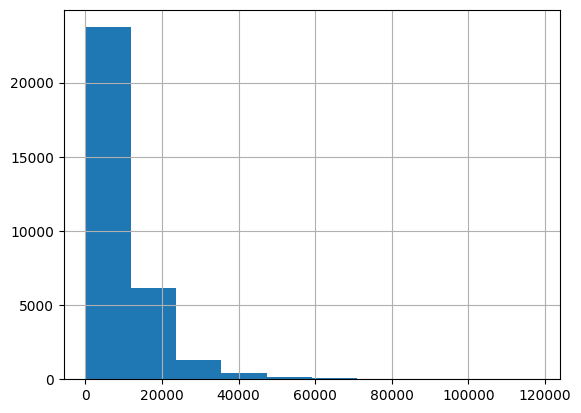

In [32]:
y = df["Price"]
X = df.drop(["Price"], axis = 1)
y.hist();

_Важно_ отметить, что особенностью методов обучения на больших данных является потенциальная ситуация переобучения/недообучения в ходе оптимизации. Проще всего это представить как ситуацию, в которой мы ошибемся в выбранных значениях коэффициентов. Такое явление может происходить если, например, модель будет воспринимать все ошибки, случайности и сознательные искажения входных данных как важные признаки для точного
ответа. 

_Другими словами_, для данных, участвующих в обучении (обучающая выборка), наша ошибка может стремиться к нулю. Однако для
данных, отличных от обучающей выборки, точность будет оставаться невысокой. Такое явление называется __переобучение__.

Чтобы не допустить переобучения, на каждом шаге обучения мы будем проверять точность полученной модели. Для такой проверки будем
использовать так называемую __валидационную выборку__. 

Как правило, валидационная и тренировочная выборки выделяются из одних и тех
же данных. 

<blockquote>
    
В некоторых случаях кроме этих двух выборок может быть
также и третья, независимая от них. Такая выборка будет необходима
для проверки итоговой точности модели (_Тестовая выборка_). Итоговую проверочную выборку можно назвать тестовой выборкой. По существу тестовая выборка характеризует так называемую __обобщающую способность__, то
есть разность между точностью на тренировочных данных и тех данных, в которых модель должна работать в реальной жизне. Разность значений точности
должна быть как можно меньше.

Для того чтобы выделить из входных данных тренировочную и тестовую выборки, запишем следующую функцию: `train_test_split`.
Функция будет иметь входные аргументы: `x, y` — входные данные и целевые значения;  `test_size` — размер тестовой части; `random_state` — состояние генератора случайных чисел (повышает воспроизводимость результатов).

Отметим, что результат `train_test_split` будет иметь формат `ndarray`

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.DataFrame(X_train).tail()

,Year,Distance,Engine,km_year
29914,2005,170000.0,1300.0,10000.000000
5402,2006,208000.0,1300.0,13000.000000
861,1986,250000.0,1400.0,6944.444444
15844,1998,213000.0,1000.0,8875.000000
23732,2012,132683.0,1800.0,13268.300000


Проверим размерность

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22362, 4) (9585, 4) (22362,) (9585,)


И так у нас имеется 22 362 тренировочных записи и 9585 тестовых записей

## Шкалирование данных

 __Шкалирование__ - набор преобразований, проводящий признаки к единому масштабу. [Шкалирование](https://bigdataschool.ru/blog/data-normalization-and-standardization/) используется в машинном обучении (Machine Learning), поскольку разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут имеет диапазон от 0 до 1, а второй — от 1 до 1000. Для задачи регрессии второй атрибут оказывал бы большое влияние на обучение, хотя не факт, что он является более важным, чем первый. 

Мы будем использовать метод шкалирования `StandardScaler` - стандартизация. Стандартизация приводит данные к нулевому среднему ($\mu$) и единичной дисперсии ($\sigma$):
$$x_{scaled} = \frac{x−\mu}{\sigma}
$$

Когда использовать:
* Когда данные приблизительно нормально распределены.
* Для алгоритмов, чувствительных к масштабу и предполагающих нормальность:
линейная регрессия, логистическая регрессия, SVM, PCA, нейросети.
* Не подходит, если есть выбросы — они сильно влияют на среднее и std.

<blockquote>
    
Отметим, что также часто используется метод шкалирования нормализация. Нормализация `MinMaxScaler` - это масштабирует данные в диапазон [0, 1] (или другой, например [-1, 1]):
$$x_{scaled}= \frac{x-x_{min}}{(x_{max} - x_{min})}$$

 
Когда использовать:
* Когда границы данных известны и стабильны.
* Если модели требуют вход в [0,1] или [-1,1].
* Когда распределение не нормальное, и вы хотите сохранить форму распределения.
* Минус: Очень чувствителен к выбросам — один выброс может "сжать" все остальные значения.

</blockquote>

In [39]:
from sklearn.preprocessing import StandardScaler

Обратите внимание, что мы оцениваем коэффициенты шкалирования только на тренировочных данных (`fit_transform`), а на тестовых данных мы только производим преобразование с готовыми коэффициентами (`transform`)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3
22357,-0.455892,-0.105069,-0.934579,-0.639585
22358,-0.317470,0.294421,-0.934579,-0.242963
22359,-3.085913,0.735962,-0.769646,-1.043553
22360,-1.424847,0.346985,-1.429378,-0.788319
22361,0.513063,-0.497378,-0.109914,-0.207492


Теперь, когда все данные в одном диапазоне попробуем еще раз на них взглянуть

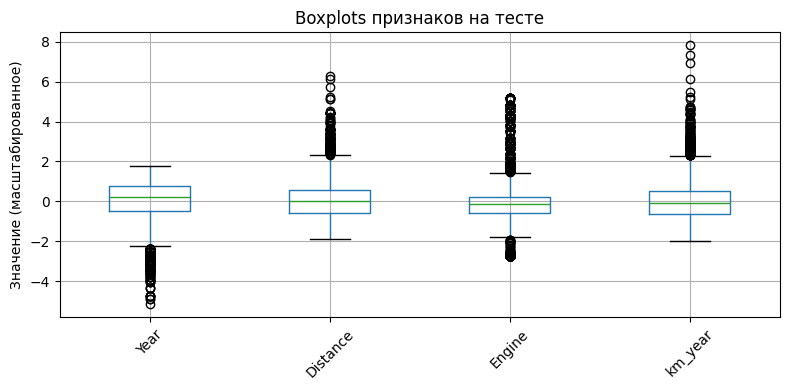

In [46]:
df_ = pd.DataFrame(X_test, columns  = X.columns)

plt.figure(figsize=(8, 4))
df_.boxplot(column=['Year', 'Distance', 'Engine', 'km_year'])
plt.title('Boxplots признаков на тесте')
plt.ylabel('Значение (масштабированное)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Исследование методов оценки цены

Опробуем алгоритм линейной регрессии на данных признаках. 

Самая простая модель регрессии. Предполагает, что зависимость между признаками и целевой переменной — линейная:

$$ \hat y = w_1\cdot Year + w_2 \cdot Distance + w_3 \cdot Engine + w_4 \cdot km_year$$

Такая модель предполагает линейную зависимость целевой переменной $\hat y$ (Price) от входных параметров. 

Цель обучения модели - найти оптимальные значения коэффицентов $ \{w_1, w_2, w_3, w_4\}$. Оптимальные значения - это такие значения, при которых средняя ошибка оценки цены $\hat y$ будет минимальна относительно ее реальных значений $y$. Другими словами мы хотим минимизировать риск дать неправильную оценку цены. Риск (среднюю ошибку / потери) мы будем называть `Loss`. 

Если предположить, что каждая наша запись в данных случайна и независима, то такой риск разумно оценить как
$$ L = {\frac{\sum{y - \hat y}^2}{N}}$$

Такая ошибка ($L$ - loss) назвывается [`Root Mean Square Error`](https://en.wikipedia.org/wiki/Mean_squared_error).  Средне-квадратическая ошибка рассчитывается для выборки длиной $N$. Фактически данная ошибка говорит следующее: чем дальше значения от реальных, тем больше в  квадрат раз штрафуется модель. Интерпретация аналогична геметрической.

Для того, чтобы обучить нашу модель - `LinearRegression` вызовим ее из библиотеки `linear_model`. Результат модели будем смотреть как значение `mean_absolute_error` (__MAE__)  и корня из `mean_squared_error` (__RMSE__).

Значения на которых мы проверяем точность будем называть словом [__метрика__](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii). 
<blockqute>
    
Отметим, что мы использовали обучение методом наименьших квадратов (`MSE`) - как наиболее точное аналитическое решение проблемы линейной регрессии. Ошибка __RMSE__ максимально характеризует результат нашего обучения. Сравнивая значения __RMSE__ для разных версий нашего алгоритма, обученных на одной и той же выборки мы можем сказать какая из версий лучше подходит для соотношения входных и выходных данных. То есть какая из версий моделей лучше объясняет это соотношение.

Однако,  для неискушенного в машинном обучении заказчика более интуитивно понятной  и ожидаемой величиной ошибки будет как раз среднее абсолютное отклонение __MAE__. 

$$ MAE = {\frac{\sum{|y - \hat y|}}{N}}$$

Можно сказать, что __RMSE__ характеризует случайный разброс значений, тогда как  __MAE__ характеризует смещение среднего значения.  Также отметим, что __MAE__ менее чувствтиельна к выбросам.


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

train_mae = mean_absolute_error(y_hat_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_hat_train, y_train))

test_mae = mean_absolute_error(y_hat_test, y_test)
test_rmse = np.sqrt(mean_squared_error(y_hat_test, y_test))

print(f"Линейная регрессия:\nTest:\tMAE: {test_mae:.1f}, \tRMSE: {test_rmse:.1f}\nTrain:\tMAE: {train_mae:.1f}, \tRMSE: {train_rmse:.1f}")

Линейная регрессия:
Test:	MAE: 4120.1, 	RMSE: 6880.0
Train:	MAE: 4115.1, 	RMSE: 6798.5


In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

train_predictions = rfr.predict(X_train)
train_score = rfr.score(X_train,y_train)

test_predictions = rfr.predict(X_test)
test_score = rfr.score(X_test,y_test)

print(test_score,train_score)

0.7811527791343055 0.9702547707288428


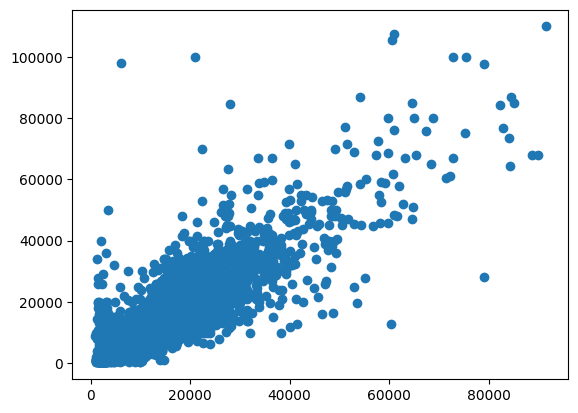

In [25]:
plt.scatter(test_predictions,y_test)